#  Housing Dataset:

### 1. Import Libraries and Data:

In [344]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [345]:
df = pd.read_csv("HousingData.csv")

### 2. Exploratory Data Analysis:

In [346]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [347]:
# I cannot remember which feature is which, so I am renaming them for additional context
column_mapping = {
    "CRIM": "crime_rate",
    "ZN": "residential_land",
    "INDUS": "business_land",
    "CHAS": "by_river",
    "NOX": "nox_concentration",
    "RM": "avg_rooms",
    "AGE": "old_homes",
    "DIS": "job_distance",
    "RAD": "highway_access",
    "TAX": "property_tax",
    "PTRATIO": "student_teacher_ratio",
    "B": "black_population",
    "LSTAT": "low_status_pct",
    "MEDV": "median_value"
}

df = df.rename(columns=column_mapping)


In [348]:
# Getting a sense of the rows and columns
df.shape

(506, 14)

In [349]:
# Getting a sense of the data within the columns
df.describe()

,crime_rate,residential_land,business_land,by_river,nox_concentration,avg_rooms,old_homes,job_distance,highway_access,property_tax,student_teacher_ratio,black_population,low_status_pct,median_value
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [350]:
# Understanding the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   crime_rate             486 non-null    float64
 1   residential_land       486 non-null    float64
 2   business_land          486 non-null    float64
 3   by_river               486 non-null    float64
 4   nox_concentration      506 non-null    float64
 5   avg_rooms              506 non-null    float64
 6   old_homes              486 non-null    float64
 7   job_distance           506 non-null    float64
 8   highway_access         506 non-null    int64  
 9   property_tax           506 non-null    int64  
 10  student_teacher_ratio  506 non-null    float64
 11  black_population       506 non-null    float64
 12  low_status_pct         486 non-null    float64
 13  median_value           506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


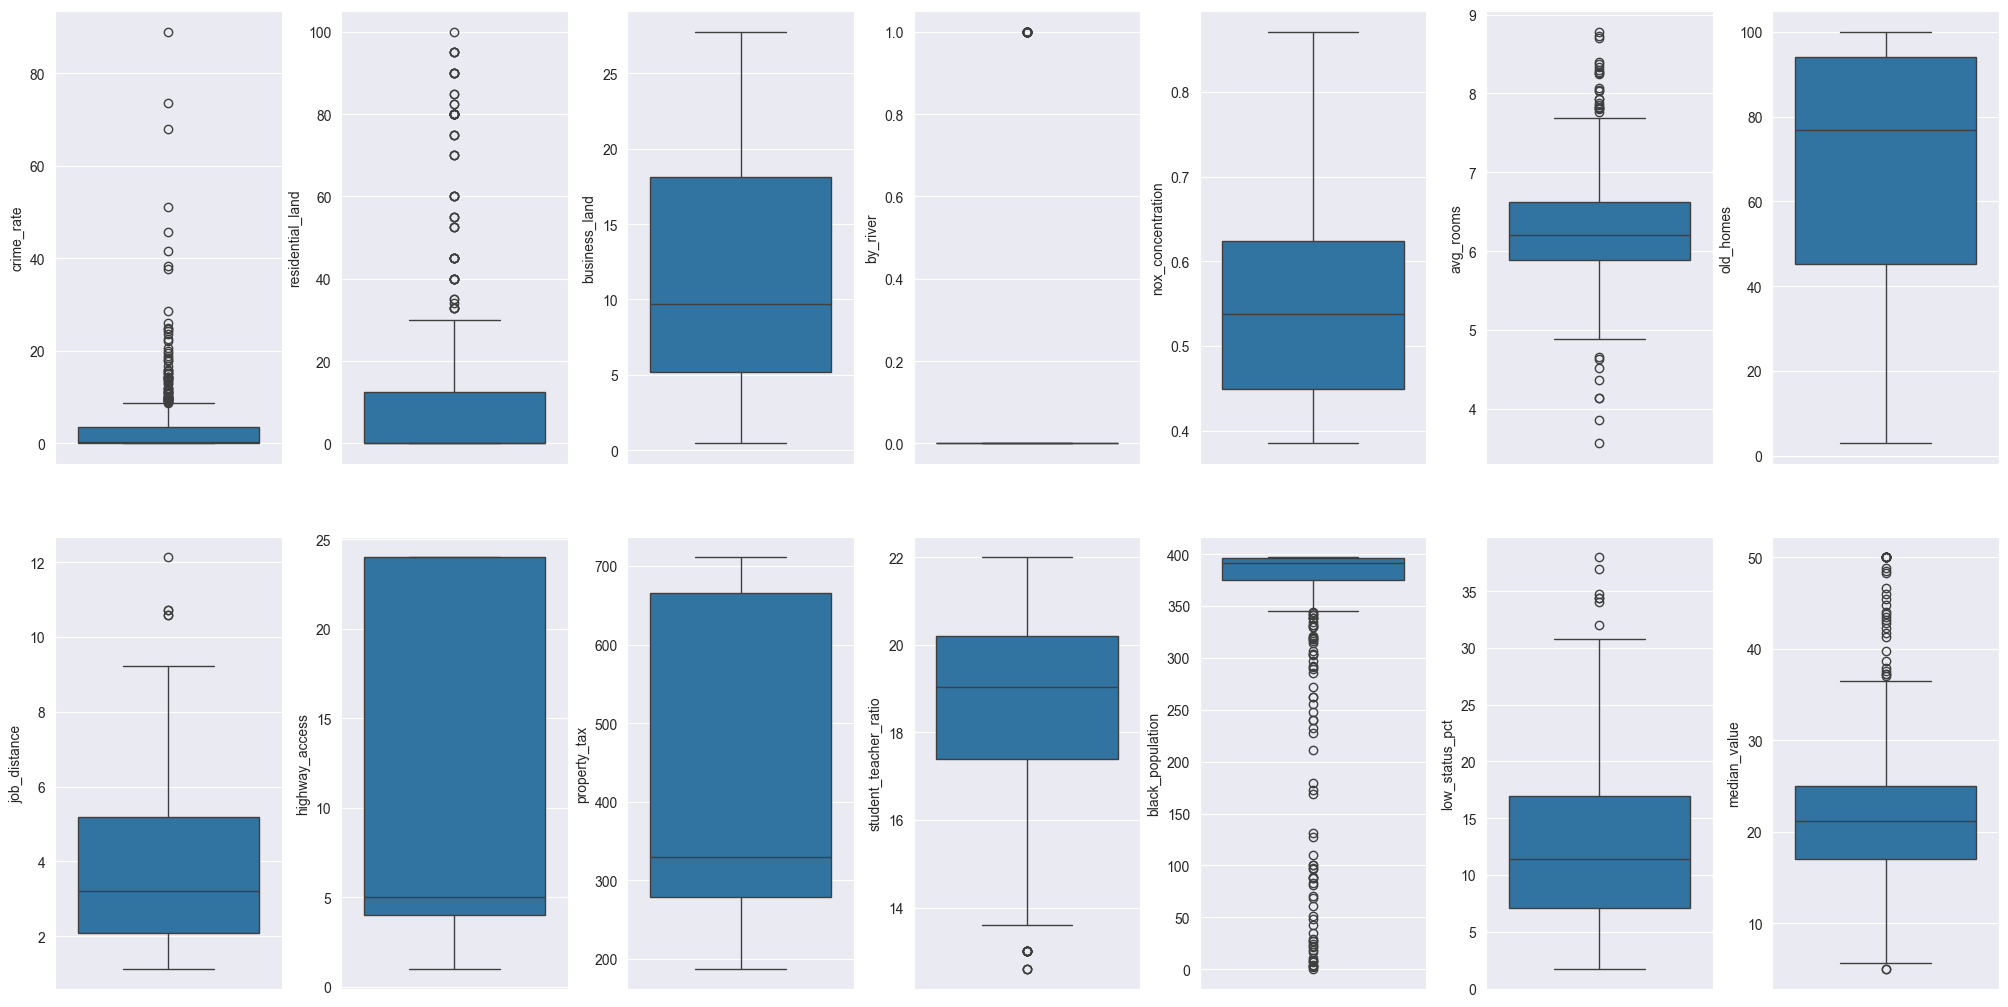

In [351]:
# Plotting the distributions of the features 

fig, axis = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
idx = 0
axis = axis.flatten()
for key, val in df.items():
    sns.boxplot(y=key, data=df, ax=axis[idx])
    idx += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<Axes: >

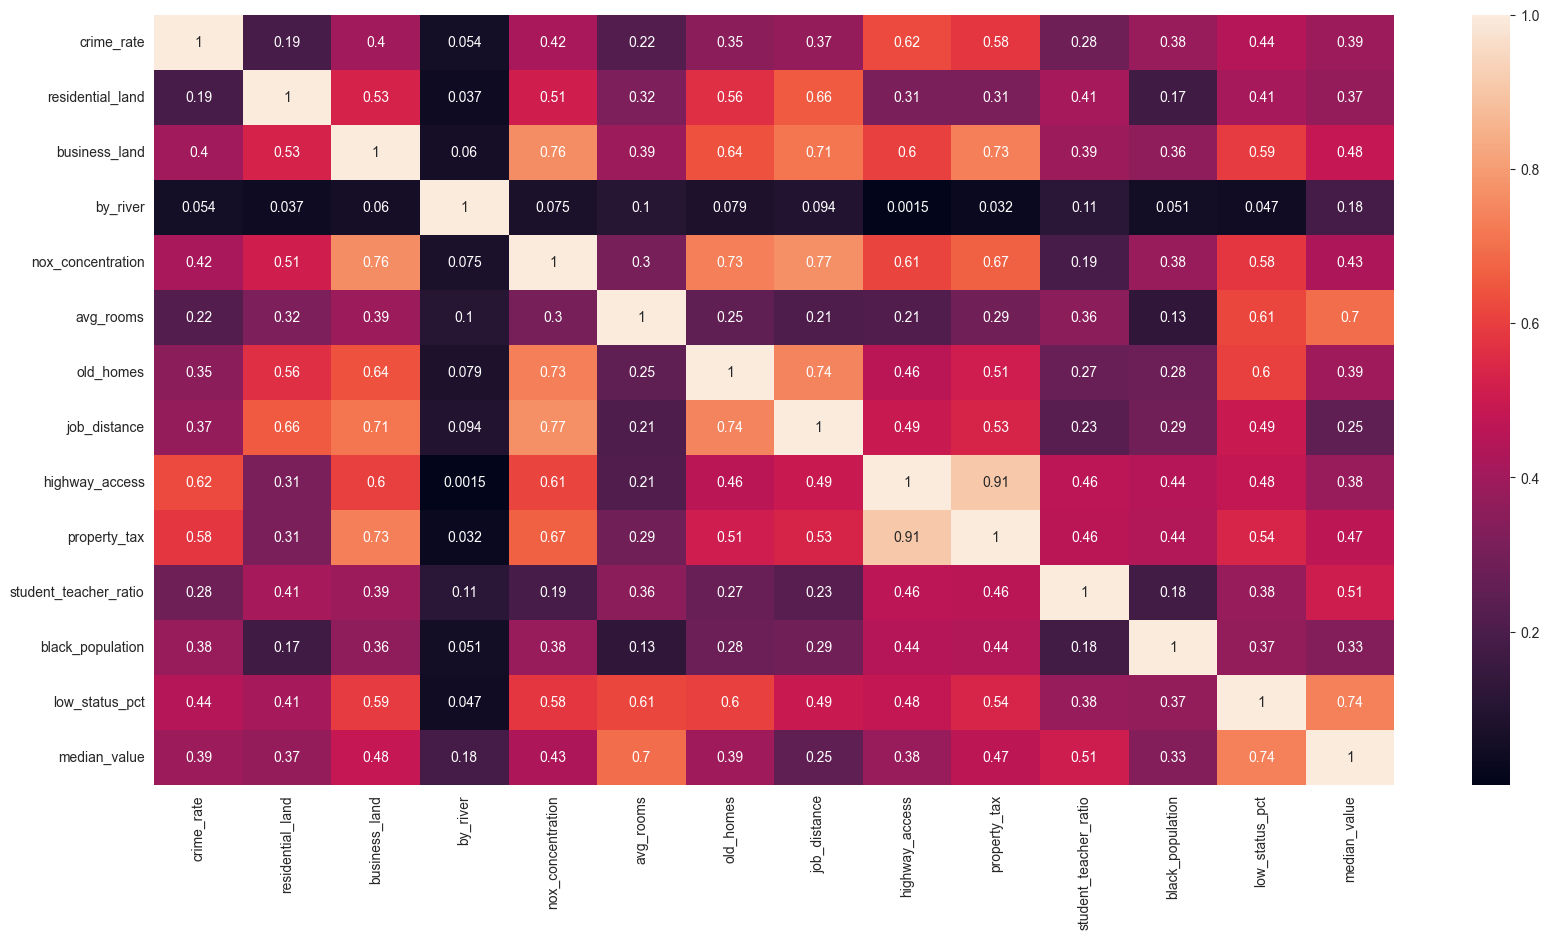

In [352]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

In [353]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split

class BostonHousingEDA:
    def __init__(self, data):
        """
        Initializes the EDA class with the data for Boston Housing
        """
        # Set attributes
        self.data = data
        self.scaled_data = None
        self.cleaned_data = None
        self.X = None
        self.y = None
        self.column_mapping = {
            "CRIM": "crime_rate",
            "ZN": "residential_land",
            "INDUS": "business_land",
            "CHAS": "by_river",
            "NOX": "nox_concentration",
            "RM": "avg_rooms",
            "AGE": "old_homes",
            "DIS": "job_distance",
            "RAD": "highway_access",
            "TAX": "property_tax",
            "PTRATIO": "student_teacher_ratio",
            "B": "black_population",
            "LSTAT": "low_status_pct",
            "MEDV": "median_value"
        }
        self.data = self.data.rename(columns=self.column_mapping)
        
        # Define X and y
        self.X = self.data.drop(columns=['median_value'])
        self.y = self.data['median_value']

    def handle_missing_values(self, strategy="mean"):
        """
        Handles missing values in the dataset with three methods
        """
        if strategy == "mean":
            self.data.fillna(self.data.mean(), inplace=True)
        elif strategy == "median":
            self.data.fillna(self.data.median(), inplace=True)
        elif strategy == "drop":
            self.data.dropna(inplace=True)
        else:
            raise ValueError("Error. Select value")

    def visualize_data_distribution(self):
        """
        Visualize the distribution of all features in the dataset to get a sense of shape
        """
        # Create the fig
        plt.figure(figsize=(20, 15))
        
        # Iterate over the columns and plot each
        for i, col in enumerate(self.data.columns, 1):
            # Create a subplot
            plt.subplot(4, 4, i)
            # Plot the histplot
            sns.histplot(self.data[col], kde=True, bins=30)
            plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.show()

    def visualize_correlation_matrix(self):
        """
        Plot the correlation matrix
        """
        # Get correlation
        corr_matrix = self.data.corr()
        # Create fig
        plt.figure(figsize=(12, 8))
        # Create heatmap
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
        plt.title('Correlation Matrix')
        plt.show()

    def handle_multicollinearity(self, threshold=0.75):
        """
        Identify and remove highly correlated features based on a given threshold.
        """
        # add target y
        self.y = self.data['median_value']
        
        # create a copy of the features 
        self.X = self.data.drop(columns=['median_value'])
        
        # calc the correlation matrix of the features
        corr_matrix = self.X.corr().abs()
        upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        
        # drop with high corr
        to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
        self.cleaned_data = self.X.drop(columns=to_drop)
        
        # update self.X with cleaned data
        self.X = self.cleaned_data
    
        print(f"The columns dropped due to MCL: {to_drop}")
        print(f"Remaining columns: {self.cleaned_data.columns.tolist()}")
        
        return self.cleaned_data, self.y



    def scale_data(self, method='standard'):
        """
        Scale the data using the selected method and return scaled X and y
        """
        
        # If/else with three options to compare for assignemtn
        if method == 'standard':
            scaler = StandardScaler()
        elif method == 'minmax':
            scaler = MinMaxScaler()
        elif method == 'power':
            scaler = PowerTransformer()
        else:
            raise ValueError("Error. Pick one")

        # Use cleaned data
        data_to_scale = self.X if self.X is not None else self.data.drop(columns=['median_value'])
        self.scaled_data = pd.DataFrame(scaler.fit_transform(data_to_scale), columns=data_to_scale.columns)
        
        # return X and y for splitting
        return self.scaled_data, self.y

    def pca_visualization(self, n_components=2):
        """
        Apply the PCA algo to visualize the data
        """
        
        # Check for scaled data
        if self.scaled_data is None:
            print("Please scale the data first.")
            return
        
        # Apply PCA
        pca = PCA(n_components=n_components)
        pca_components = pca.fit_transform(self.scaled_data)

        # Plot results
        plt.figure(figsize=(8, 6))
        plt.scatter(pca_components[:, 0], pca_components[:, 1], c=self.y, cmap='viridis')
        plt.colorbar(label='Median Value')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title('PCA Visualization (2 components)')
        plt.show()

    def summarize_data(self):
        """
        Summarize data
        """
        print(self.data.describe())
        
    def show_r2(self, y_test, y_pred):
        """
        show the r2 plot
        """
        # calc r2 score
        r2 = r2_score(y_test, y_pred)
        print(f"R2 Score: {r2:.4f}")

        # Plot y_test vs y_pred
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7, label='Predicted Vals vs Actual Vals')
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Line of Perfect fit')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'R2 Correlation: {r2:.4f}')
        plt.legend()
        plt.grid(True)
        plt.show()


In [354]:
# Load the dataset
df = pd.read_csv("HousingData.csv")


In [355]:
# Initialize the EDA class 
eda = BostonHousingEDA(df)

# Handle missing values
eda.handle_missing_values(strategy='mean')


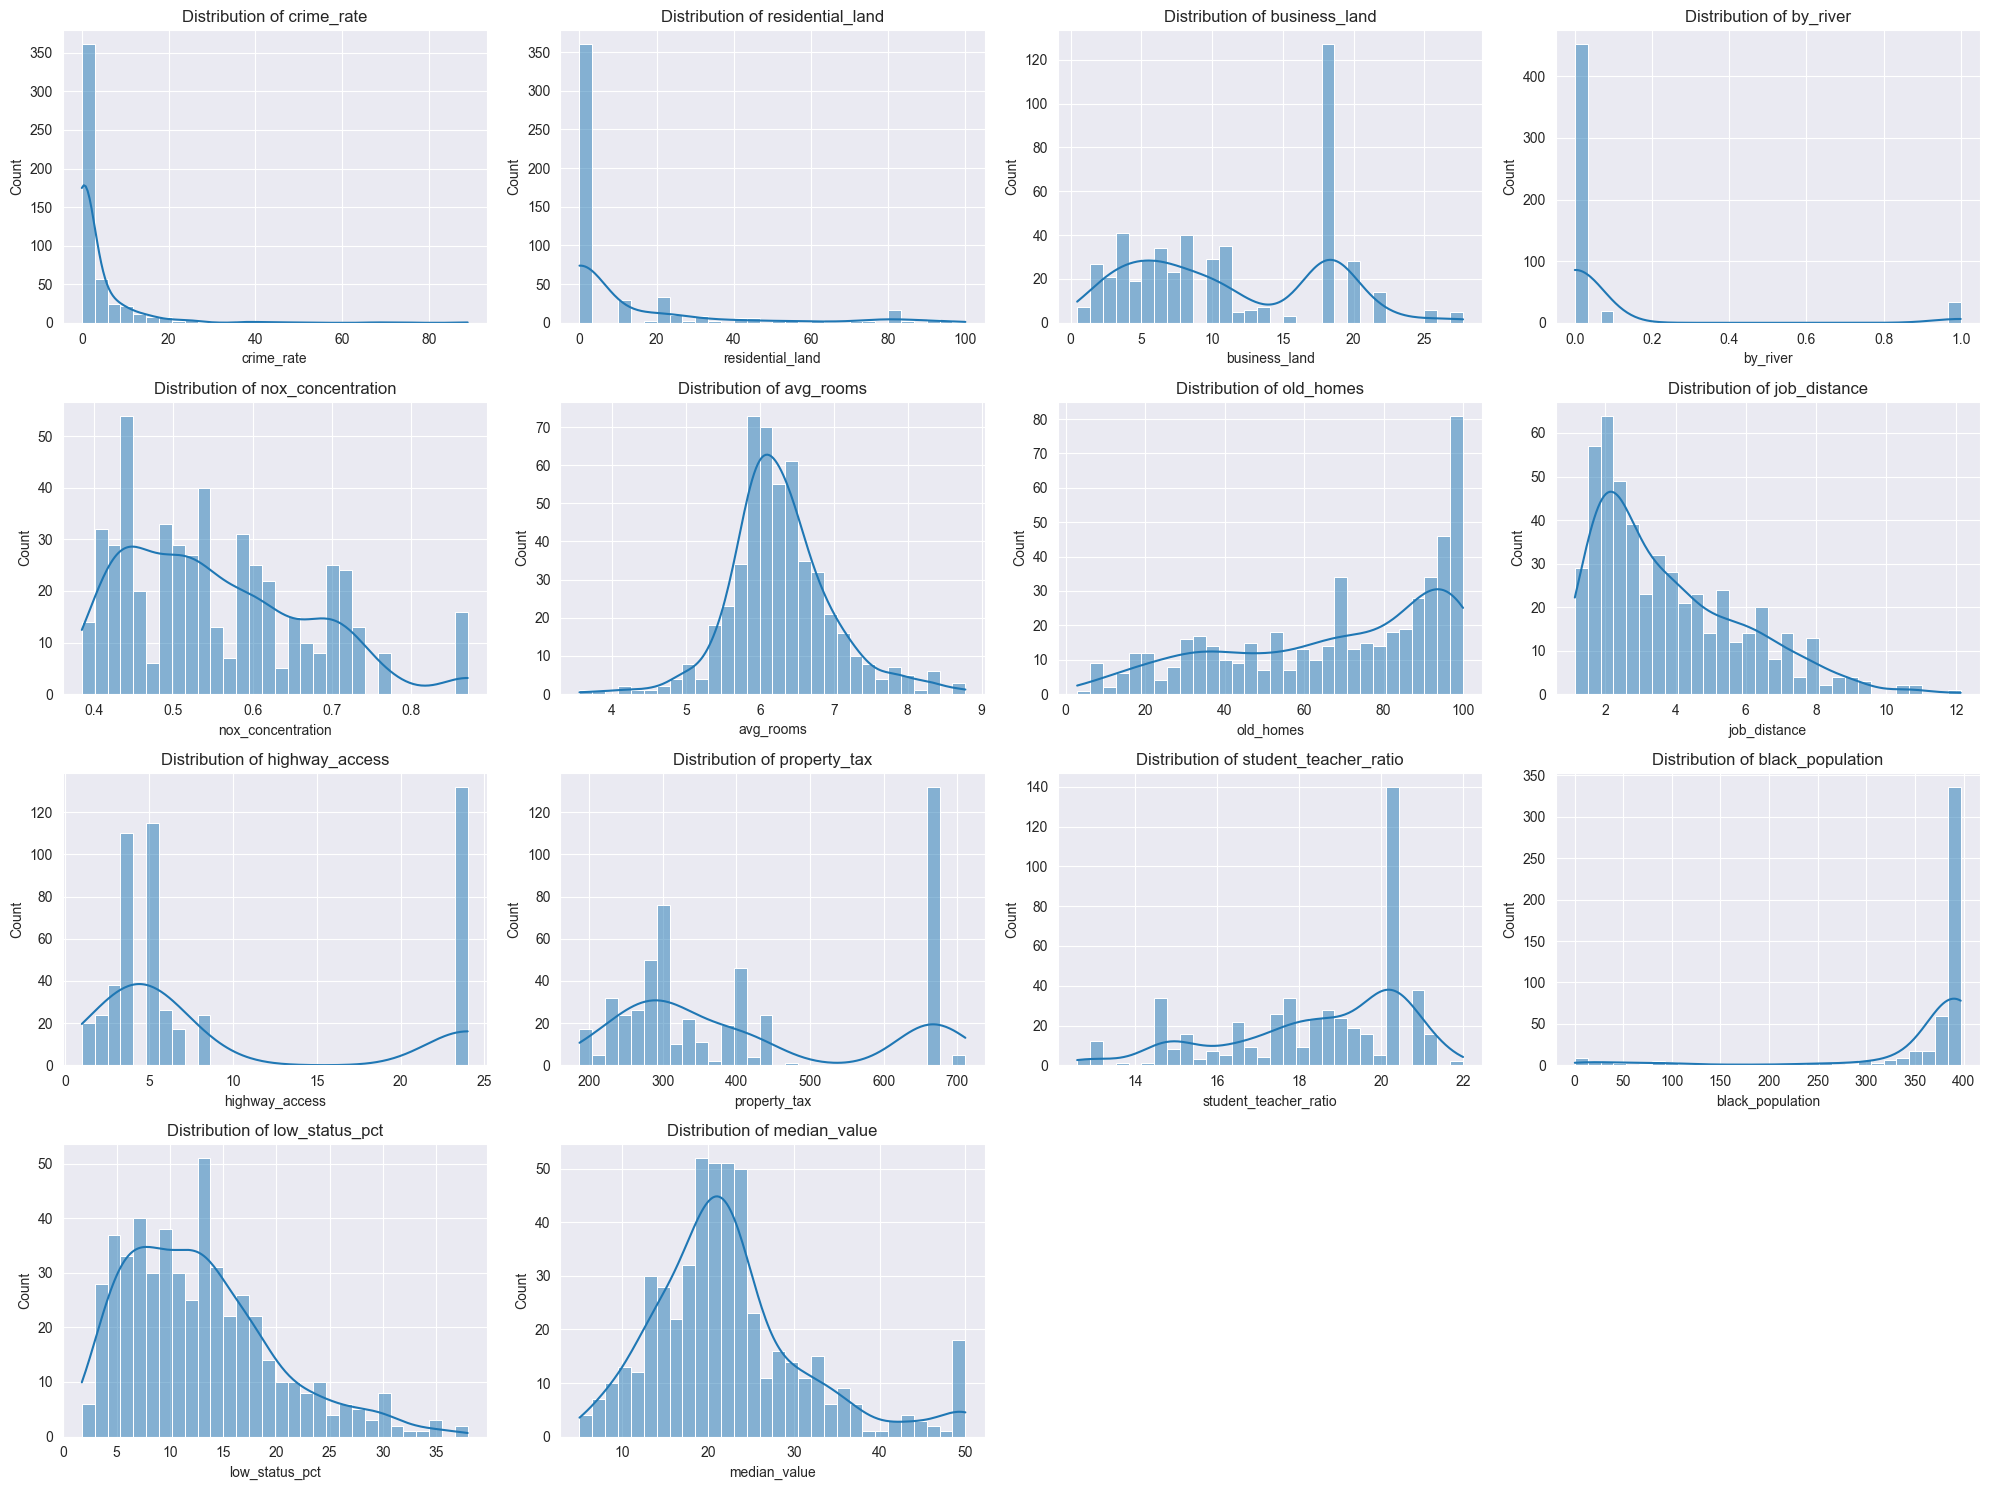

In [356]:
# Visualize the data distribution
eda.visualize_data_distribution()


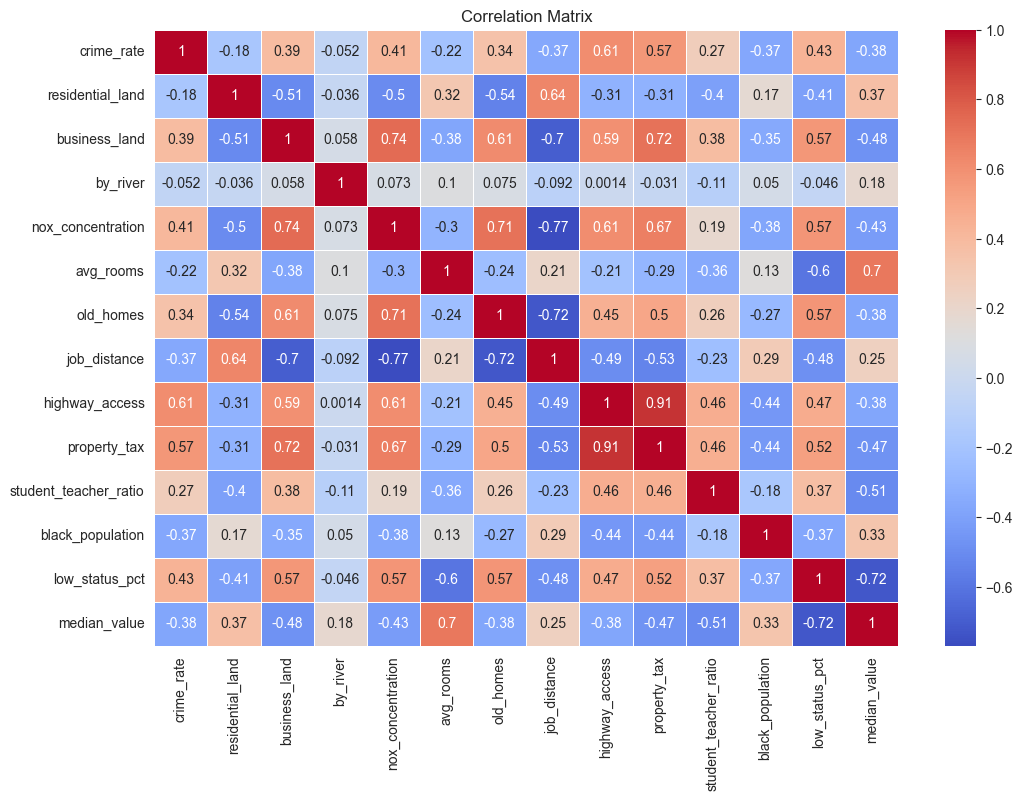

In [357]:
# Visualize the correlation matrix
eda.visualize_correlation_matrix()

## 3. Data Preprocessing:

In [358]:
eda.summarize_data()

       crime_rate  residential_land  business_land    by_river  \
count  506.000000        506.000000     506.000000  506.000000   
mean     3.611874         11.211934      11.083992    0.069959   
std      8.545770         22.921051       6.699165    0.250233   
min      0.006320          0.000000       0.460000    0.000000   
25%      0.083235          0.000000       5.190000    0.000000   
50%      0.290250          0.000000       9.900000    0.000000   
75%      3.611874         11.211934      18.100000    0.000000   
max     88.976200        100.000000      27.740000    1.000000   

       nox_concentration   avg_rooms   old_homes  job_distance  \
count         506.000000  506.000000  506.000000    506.000000   
mean            0.554695    6.284634   68.518519      3.795043   
std             0.115878    0.702617   27.439466      2.105710   
min             0.385000    3.561000    2.900000      1.129600   
25%             0.449000    5.885500   45.925000      2.100175   
50%      

In [399]:
# Handle multicollinearity
X, y = eda.handle_multicollinearity(threshold=0.75)

X.head()


The columns dropped due to MCL: ['job_distance', 'property_tax']
Remaining columns: ['crime_rate', 'residential_land', 'business_land', 'by_river', 'nox_concentration', 'avg_rooms', 'old_homes', 'highway_access', 'student_teacher_ratio', 'black_population', 'low_status_pct']


,crime_rate,residential_land,business_land,by_river,nox_concentration,avg_rooms,old_homes,highway_access,student_teacher_ratio,black_population,low_status_pct
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,1,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,2,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,2,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,3,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,3,18.7,396.90,12.715432


In [400]:
# sxcale data
X, y = eda.scale_data(method='minmax')

print(X.shape)

X.head()

(506, 11)


,crime_rate,residential_land,business_land,by_river,nox_concentration,avg_rooms,old_homes,highway_access,student_teacher_ratio,black_population,low_status_pct
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.000000,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.043478,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.043478,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.086957,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.086957,0.648936,1.000000,0.303130


In [401]:
print(X.head())

   crime_rate  residential_land  business_land  by_river  nox_concentration  \
0    0.000000              0.18       0.067815       0.0           0.314815   
1    0.000236              0.00       0.242302       0.0           0.172840   
2    0.000236              0.00       0.242302       0.0           0.172840   
3    0.000293              0.00       0.063050       0.0           0.150206   
4    0.000705              0.00       0.063050       0.0           0.150206   

   avg_rooms  old_homes  highway_access  student_teacher_ratio  \
0   0.577505   0.641607        0.000000               0.287234   
1   0.547998   0.782698        0.043478               0.553191   
2   0.694386   0.599382        0.043478               0.553191   
3   0.658555   0.441813        0.086957               0.648936   
4   0.687105   0.528321        0.086957               0.648936   

   black_population  low_status_pct  
0          1.000000        0.089680  
1          1.000000        0.204470  
2          0.9

In [402]:
len(y)

506

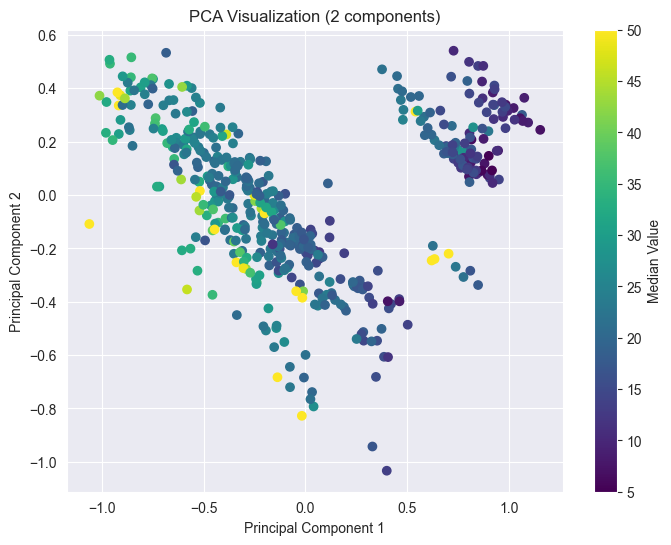

In [403]:
# visualize again
eda.pca_visualization(n_components=2)

In [404]:
# describe
eda.summarize_data()

       crime_rate  residential_land  business_land    by_river  \
count  506.000000        506.000000     506.000000  506.000000   
mean     3.611874         11.211934      11.083992    0.069959   
std      8.545770         22.921051       6.699165    0.250233   
min      0.006320          0.000000       0.460000    0.000000   
25%      0.083235          0.000000       5.190000    0.000000   
50%      0.290250          0.000000       9.900000    0.000000   
75%      3.611874         11.211934      18.100000    0.000000   
max     88.976200        100.000000      27.740000    1.000000   

       nox_concentration   avg_rooms   old_homes  job_distance  \
count         506.000000  506.000000  506.000000    506.000000   
mean            0.554695    6.284634   68.518519      3.795043   
std             0.115878    0.702617   27.439466      2.105710   
min             0.385000    3.561000    2.900000      1.129600   
25%             0.449000    5.885500   45.925000      2.100175   
50%      

In [405]:
from sklearn.model_selection import train_test_split

# Split the X and y from each other

# Test this on different scalers to see what works best
X, y = eda.scale_data(method='minmax')

In [406]:
X

,crime_rate,residential_land,business_land,by_river,nox_concentration,avg_rooms,old_homes,highway_access,student_teacher_ratio,black_population,low_status_pct
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.000000,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.043478,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.043478,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.086957,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.086957,0.648936,1.000000,0.303130
...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.000000,0.893617,0.987619,0.303130
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.000000,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.000000,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.000000,0.893617,0.991301,0.131071


In [407]:
# Split the data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [408]:
print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)
print("y_train.shape", y_train.shape)
print("y_test.shape", y_test.shape)


X_train.shape (404, 11)
X_test.shape (102, 11)
y_train.shape (404,)
y_test.shape (102,)


In [409]:
X_train

,crime_rate,residential_land,business_land,by_river,nox_concentration,avg_rooms,old_homes,highway_access,student_teacher_ratio,black_population,low_status_pct
477,0.168788,0.000000,0.646628,0.0,0.471193,0.333972,0.972194,1.000000,0.808511,0.880428,0.639625
15,0.006981,0.000000,0.281525,0.0,0.314815,0.435524,0.552008,0.130435,0.893617,0.996772,0.185982
332,0.000319,0.112119,0.205279,0.0,0.108848,0.473271,0.210093,0.000000,0.457447,0.912628,0.168322
423,0.079174,0.000000,0.646628,0.0,0.471193,0.487066,0.675783,1.000000,0.808511,0.005547,0.594923
19,0.008087,0.000000,0.281525,0.0,0.314815,0.415022,0.685891,0.130435,0.893617,0.984997,0.263521
...,...,...,...,...,...,...,...,...,...,...,...
106,0.001853,0.000000,0.296921,0.0,0.277778,0.435907,0.916581,0.173913,0.882979,0.996898,0.467163
270,0.003291,0.200000,0.238270,0.0,0.162551,0.439739,0.403708,0.086957,0.638298,0.979197,0.310982
348,0.000098,0.800000,0.056818,0.0,0.102881,0.589002,0.276004,0.130435,0.468085,0.984972,0.117550
435,0.125369,0.000000,0.646628,0.0,0.730453,0.587852,0.944387,1.000000,0.808511,0.276186,0.594371


In [410]:
X_train.head()

,crime_rate,residential_land,business_land,by_river,nox_concentration,avg_rooms,old_homes,highway_access,student_teacher_ratio,black_population,low_status_pct
477,0.168788,0.000000,0.646628,0.0,0.471193,0.333972,0.972194,1.000000,0.808511,0.880428,0.639625
15,0.006981,0.000000,0.281525,0.0,0.314815,0.435524,0.552008,0.130435,0.893617,0.996772,0.185982
332,0.000319,0.112119,0.205279,0.0,0.108848,0.473271,0.210093,0.000000,0.457447,0.912628,0.168322
423,0.079174,0.000000,0.646628,0.0,0.471193,0.487066,0.675783,1.000000,0.808511,0.005547,0.594923
19,0.008087,0.000000,0.281525,0.0,0.314815,0.415022,0.685891,0.130435,0.893617,0.984997,0.263521


In [411]:
y_train

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: median_value, Length: 404, dtype: float64

### 4. OLS regression:

In [412]:
import numpy as np

class OLSRegression:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        """
        Fit method that computes OLS
        """
        # add bias term to X
        ones_column = np.ones((X.shape[0], 1))
        X_bias = np.concatenate((ones_column, X), axis=1)
        
        # Compute X^T
        X_transpose = X_bias.T
        
        # multiply X^T by X
        X_transpose_X = X_transpose.dot(X_bias)  
        
        # inverse of (X^T * X)
        X_transpose_X_inv = np.linalg.inv(X_transpose_X) 
        
        # multiply the inverse by X^T
        X_transpose_X_inv_X_transpose = X_transpose_X_inv.dot(X_transpose) 
        
        # multiply by y to get the coefficiens
        self.theta = X_transpose_X_inv_X_transpose.dot(y)
        

    def predict(self, X):
        """
        Make predictions 
        """
        # add bias term to X 
        ones_column = np.ones((X.shape[0], 1))
        X_bias = np.concatenate((ones_column, X), axis=1) 
        
        # multiply X_bias by theta
        y_pred = X_bias.dot(self.theta)
        
        # Return the pred values
        return y_pred


OLS Regression Mean Squared Error: 29.17862654453569
OLS Regression R2 Score: 0.6021120786753205
R2 Score: 0.6021


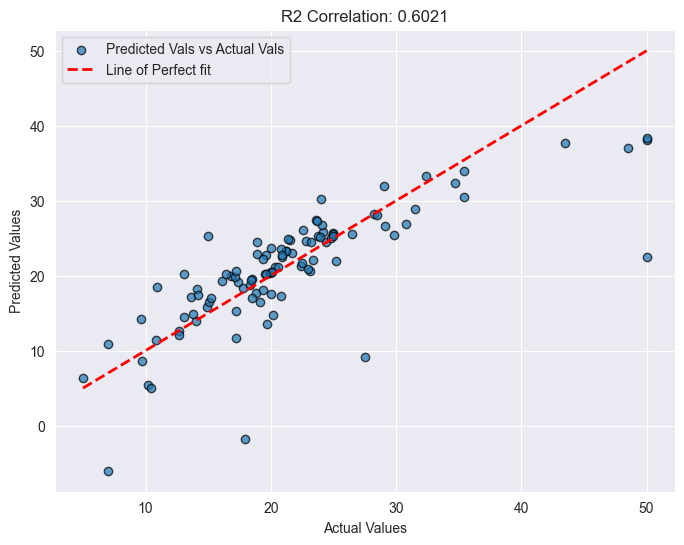

In [413]:
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the OLS regression model
ols_model = OLSRegression()

# Fit the model on training data
ols_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ols_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"OLS Regression Mean Squared Error: {mse}")
print(f"OLS Regression R2 Score: {r2}")

eda.show_r2(y_test, y_pred)

SLK LinearRegression Mean Squared Error: 25.812604382189612
SKL LinearRegression R2 Score: 0.6480120993382017
R2 Score: 0.6480


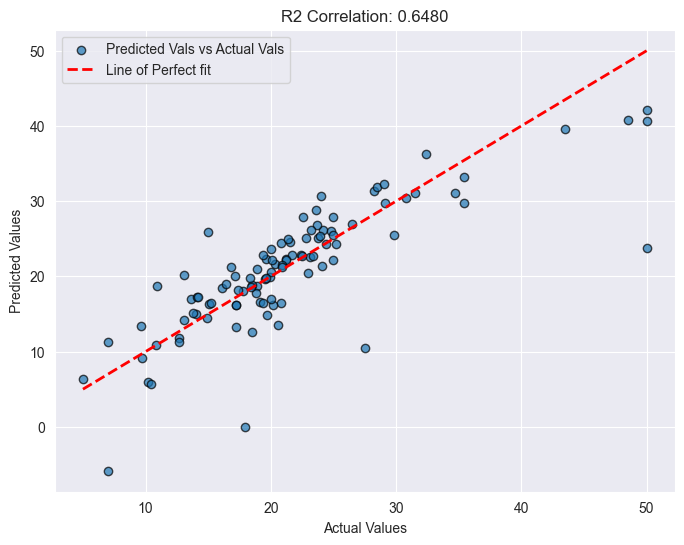

In [337]:
from sklearn.linear_model import LinearRegression

# Testing Linear Regression from SKLearn to compare

# Init the linreg model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate like previously using MSE and R2
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"SLK LinearRegression Mean Squared Error: {mse_lr}")
print(f"SKL LinearRegression R2 Score: {r2_lr}")

eda.show_r2(y_test, y_pred)



### 5. Ridge Regression:

In [338]:
class RidgeRegression:
    def __init__(self, alpha=1.0):
        """
        Init the Ridge Regression model
        """
        self.alpha = alpha
        self.theta = None

    def fit(self, X, y):
        """
        Fit method for Ridge Regression using the normal equation
        """
        # add bias term to X
        X_bias = np.c_[np.ones((X.shape[0], 1)), X]

        # Calcuate theta using the normal equation with L2 reg
        identity = np.eye(X_bias.shape[1])
        identity[0, 0] = 0
        self.theta = np.linalg.inv(X_bias.T.dot(X_bias) + self.alpha * identity).dot(X_bias.T).dot(y)

    def predict(self, X):
        """
        predict method for ridge reg model
        """
        # add bias term (intercept)
        X_bias = np.c_[np.ones((X.shape[0], 1)), X]
        return X_bias.dot(self.theta)

In [339]:
alphas = [0.5, 1, 1.5, 2]

#iterate over multiple alpha vals
for alpha in alphas:
    print("-----------------------")
    print(f"\nAlpha = {alpha}:")
    ridge = RidgeRegression(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    print(f"Ridge MSE: {mean_squared_error(y_test, y_pred_ridge)}")
    print(f"Ridge R2: {r2_score(y_test, y_pred_ridge)}")


-----------------------

Alpha = 0.5:
Ridge MSE: 25.19079436852606
Ridge R2: 0.6564912747859506
-----------------------

Alpha = 1:
Ridge MSE: 24.832196260159254
Ridge R2: 0.6613812189960132
-----------------------

Alpha = 1.5:
Ridge MSE: 24.63624181400551
Ridge R2: 0.6640533086893179
-----------------------

Alpha = 2:
Ridge MSE: 24.548498714424547
Ridge R2: 0.665249798162514


### 5. Lasso Regression:

In [340]:
class LassoRegression:
    def __init__(self, alpha=1.0, n_iterations=1000, learning_rate=0.01):
        """
        Init the Lasso Regression model
        """
        self.alpha = alpha
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate
        self.theta = None

    def fit(self, X, y):
        """
        Fir method using coordinate desent
        """
        # add bias term to X
        X_bias = np.c_[np.ones((X.shape[0], 1)), X]
        
        # set samples and feats
        n_samples, n_features = X_bias.shape

        # init theta
        self.theta = np.zeros(n_features)

        # implement gradient descent
        for _ in range(self.n_iterations):
            
            # set pred
            y_pred = X_bias.dot(self.theta)
            
            # set gradient via bias times dot
            gradients = X_bias.T.dot(y_pred - y) / n_samples
            
            # update theta with L1 reg
            for j in range(1, n_features):
                self.theta[j] -= self.learning_rate * (gradients[j] + self.alpha * np.sign(self.theta[j]))
                
            # update intercept separately
            self.theta[0] -= self.learning_rate * gradients[0]

    def predict(self, X):
        """
        pred new data with Lasso reg
        """
        # Add bias term
        X_bias = np.c_[np.ones((X.shape[0], 1)), X]
        
        # return product
        return X_bias.dot(self.theta)

In [341]:
from sklearn.metrics import mean_squared_error, r2_score

#iterate over multiple alpha vals
alphas = [0.5, 1, 1.5, 2]
for alpha in alphas:
    print("-----------------------")
    print(f"\nalpha = {alpha}:")
    lasso = LassoRegression(alpha=alpha, learning_rate=0.01, n_iterations=1000)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    print(f"Lasso MSE: {mean_squared_error(y_test, y_pred_lasso)}")
    print(f"Lasso R2: {r2_score(y_test, y_pred_lasso)}")


-----------------------

alpha = 0.5:
Lasso MSE: 49.00844114265968
Lasso R2: 0.33170717463850197
-----------------------

alpha = 1:
Lasso MSE: 62.05883125966329
Lasso R2: 0.15374840100653564
-----------------------

alpha = 1.5:
Lasso MSE: 66.47302374946402
Lasso R2: 0.09355523627984508
-----------------------

alpha = 2:
Lasso MSE: 70.73738742806061
Lasso R2: 0.03540517917350694


In [342]:
from sklearn.linear_model import Ridge, Lasso

alphas = [0.5, 0.75, 1, 1.5, 2]

# iterate over multiple alpha vals
for alpha in alphas:
    # ridge model
    print(f"\nSklearn Ridge alpha = {alpha}:")
    sklearn_ridge = Ridge(alpha=alpha)
    sklearn_ridge.fit(X_train, y_train)
    y_pred_ridge_sklearn = sklearn_ridge.predict(X_test)
    print(f"Ridge MSE: {mean_squared_error(y_test, y_pred_ridge_sklearn)}")
    print(f"Ridge R²: {r2_score(y_test, y_pred_ridge_sklearn)}")
    
    # lasso model
    print(f"\nSklearn Lasso alpha = {alpha}:")
    sklearn_lasso = Lasso(alpha=alpha, max_iter=1000)
    sklearn_lasso.fit(X_train, y_train)
    y_pred_lasso_sklearn = sklearn_lasso.predict(X_test)
    print(f"Lasso MSE: {mean_squared_error(y_test, y_pred_lasso_sklearn)}")
    print(f"Lasso R²: {r2_score(y_test, y_pred_lasso_sklearn)}")



Sklearn Ridge alpha = 0.5:
Ridge MSE: 25.19079436852541
Ridge R²: 0.6564912747859595

Sklearn Lasso alpha = 0.5:
Lasso MSE: 33.62830965344012
Lasso R²: 0.5414349539294651

Sklearn Ridge alpha = 0.75:
Ridge MSE: 24.986408159234436
Ridge R²: 0.6592783423622244

Sklearn Lasso alpha = 0.75:
Lasso MSE: 44.60185159749377
Lasso R²: 0.39179666348339326

Sklearn Ridge alpha = 1:
Ridge MSE: 24.83219626015898
Ridge R²: 0.6613812189960169

Sklearn Lasso alpha = 1:
Lasso MSE: 57.565892476652685
Lasso R²: 0.21501537223571798

Sklearn Ridge alpha = 1.5:
Ridge MSE: 24.636241814005345
Ridge R²: 0.6640533086893202

Sklearn Lasso alpha = 1.5:
Lasso MSE: 75.04543037399255
Lasso R²: -0.023340500652033302

Sklearn Ridge alpha = 2:
Ridge MSE: 24.548498714424312
Ridge R²: 0.6652497981625172

Sklearn Lasso alpha = 2:
Lasso MSE: 75.04543037399255
Lasso R²: -0.023340500652033302


## 6. Compare Results:

In [343]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso

# Initialize and train the OLS regression model
def evaluate_models(X_train, X_test, y_train, y_test, alpha=None):
    # Initialize result dictionary
    results = {
        "Model": [],
        "alpha": [],
        "scaler": [],
        "Custom R2": [],
        "Custom MSE": [],
        "Sklearn R2": [],
        "Sklearn MSE": []
    }
    
    # custom OLS
    if alpha is None: 
        ols_model = OLSRegression()
        ols_model.fit(X_train, y_train)
        y_pred_ols = ols_model.predict(X_test)
        mse_ols = mean_squared_error(y_test, y_pred_ols)
        r2_ols = r2_score(y_test, y_pred_ols)

        # Store OLS
        results["Model"].append("OLS")
        results["alpha"].append(None)
        results["scaler"].append(current_scaler_name)
        results["Custom R2"].append(r2_ols)
        results["Custom MSE"].append(mse_ols)
        results["Sklearn R2"].append(None) 
        results["Sklearn MSE"].append(None)

    else:
        #Custom ridge
        custom_ridge = RidgeRegression(alpha=alpha)
        custom_ridge.fit(X_train, y_train)
        y_pred_custom_ridge = custom_ridge.predict(X_test)
        mse_custom_ridge = mean_squared_error(y_test, y_pred_custom_ridge)
        r2_custom_ridge = r2_score(y_test, y_pred_custom_ridge)

        # SKL Ridge
        sklearn_ridge = Ridge(alpha=alpha)
        sklearn_ridge.fit(X_train, y_train)
        y_pred_sklearn_ridge = sklearn_ridge.predict(X_test)
        mse_sklearn_ridge = mean_squared_error(y_test, y_pred_sklearn_ridge)
        r2_sklearn_ridge = r2_score(y_test, y_pred_sklearn_ridge)
        
        # Save results
        results["Model"].append("Ridge")
        results["alpha"].append(alpha)
        results["scaler"].append(current_scaler_name)
        results["Custom R2"].append(r2_custom_ridge)
        results["Custom MSE"].append(mse_custom_ridge)
        results["Sklearn R2"].append(r2_sklearn_ridge)
        results["Sklearn MSE"].append(mse_sklearn_ridge)

        # custom lasso
        custom_lasso = LassoRegression(alpha=alpha, learning_rate=0.01, n_iterations=1000)
        custom_lasso.fit(X_train, y_train)
        y_pred_custom_lasso = custom_lasso.predict(X_test)
        mse_custom_lasso = mean_squared_error(y_test, y_pred_custom_lasso)
        r2_custom_lasso = r2_score(y_test, y_pred_custom_lasso)

        # sklearn lasso
        sklearn_lasso = Lasso(alpha=alpha, max_iter=1000)
        sklearn_lasso.fit(X_train, y_train)
        y_pred_sklearn_lasso = sklearn_lasso.predict(X_test)
        mse_sklearn_lasso = mean_squared_error(y_test, y_pred_sklearn_lasso)
        r2_sklearn_lasso = r2_score(y_test, y_pred_sklearn_lasso)

        # store results
        results["Model"].append("Lasso")
        results["alpha"].append(alpha)
        results["scaler"].append(current_scaler_name)
        results["Custom R2"].append(r2_custom_lasso)
        results["Custom MSE"].append(mse_custom_lasso)
        results["Sklearn R2"].append(r2_sklearn_lasso)
        results["Sklearn MSE"].append(mse_sklearn_lasso)
    
    return results

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "PowerTransformer": PowerTransformer()
}

# alpha values
alphas = [0.5, 1, 1.5, 2]

# Create DF
comparison_df = pd.DataFrame()

# Scaler mapping for original class
scaler_mapping = {
    "StandardScaler": "standard",
    "MinMaxScaler": "minmax",
    "PowerTransformer": "power"
}

# Loop through each scaler
for current_scaler_name, current_scaler in scalers.items():
    # Scale data
    X, y = eda.scale_data(method=scaler_mapping[current_scaler_name])
    
    # split to train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # evaulate OLS
    ols_results = evaluate_models(X_train, X_test, y_train, y_test, alpha=None)
    comparison_df = pd.concat([comparison_df, pd.DataFrame(ols_results)], ignore_index=True)
    
    # loop through alphas and calc ridge and lasso
    for alpha in alphas:
        current_results = evaluate_models(X_train, X_test, y_train, y_test, alpha)
        comparison_df = pd.concat([comparison_df, pd.DataFrame(current_results)], ignore_index=True)

# SHow results
comparison_df


/var/folders/r4/9ncp61z543v94_5sltg11_bm0000gn/T/ipykernel_24506/2601374963.py:119: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison_df = pd.concat([comparison_df, pd.DataFrame(current_results)], ignore_index=True)
/var/folders/r4/9ncp61z543v94_5sltg11_bm0000gn/T/ipykernel_24506/2601374963.py:114: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison_df = pd.concat([comparison_df, pd.DataFrame(ols_results)], ignore_index=True)
/var/folders/r4/9ncp61z543v94_5sltg11_bm0000gn/T/ipykernel

,Model,alpha,scaler,Custom R2,Custom MSE,Sklearn R2,Sklearn MSE
0,OLS,NaN,StandardScaler,0.648012,25.812604,NaN,NaN
1,Ridge,0.5,StandardScaler,0.648107,25.805644,0.648107,25.805644
2,Lasso,0.5,StandardScaler,0.621555,27.752815,0.621365,27.766770
3,Ridge,1.0,StandardScaler,0.648199,25.798907,0.648199,25.798907
4,Lasso,1.0,StandardScaler,0.619499,27.903557,0.619385,27.911920
5,Ridge,1.5,StandardScaler,0.648288,25.792387,0.648288,25.792387
6,Lasso,1.5,StandardScaler,0.606851,28.831112,0.606378,28.865816
7,Ridge,2.0,StandardScaler,0.648374,25.786075,0.648374,25.786075
8,Lasso,2.0,StandardScaler,0.580056,30.796118,0.580000,30.800179
9,OLS,NaN,MinMaxScaler,0.648012,25.812604,NaN,NaN
